### WIDS Datathon Project

#### EPA

In [624]:
!pip install squarify 

In [625]:
!pip install python-aqi

In [681]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as dprof
from sklearn import preprocessing
import scipy
from scipy.stats import ttest_ind
from datetime import datetime
#import aqi
import statistics
from scipy.stats import norm


%matplotlib inline
pd.options.display.max_rows =400
print('Imported libraries')


Imported libraries


In [627]:
'''Read the Excel data of 2019'''
excel_path_1='C:\Thripura\My_Personal\Self Learning\WIDS Datathon 2022 - Phase 2\ORIGINAL\Datathon_EPA_Air_Quality_Demographics_Meteorology_2019.xlsx'
df_1 = pd.read_excel(excel_path_1)
#print(df_1.head())
#print(df_1.count())


In [631]:
'''Read the Excel data for 2020'''

excel_path_2='C:\Thripura\My_Personal\Self Learning\WIDS Datathon 2022 - Phase 2\ORIGINAL\Datathon_EPA_Air_Quality_Demographics_Meteorology_2020.xlsx'
df_2 = pd.read_excel(excel_path_2)
#print(df_2.head())
#print(df_2.count())

Analyse the pollution data of 2019 and 2020

In [632]:
df_1.describe()

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
count,129470.000000,129470.000000,129393.000000,129393.000000,129393.000000,129393.000000,72703.000000,50670.000000,58576.000000,59484.000000,129470.000000,129470.000000,61395.000000,39749.000000,47337.000000,659.000000,3307.000000
mean,38.533022,-96.298816,0.383927,0.375089,0.049076,0.147154,13.576014,63.095606,2.250522,189.811975,6.962038,0.039954,7.211805,0.239979,0.504458,0.004382,0.996383
std,4.837426,17.693938,0.303357,0.215389,0.091215,0.129474,10.547154,18.520436,5.239192,62.589750,4.498417,0.011785,6.351797,0.158697,0.780967,0.004571,0.896393
min,18.420089,-158.088613,0.000000,0.000000,0.000000,0.000000,-34.814816,1.083333,0.000000,6.375000,-4.300000,0.000000,-3.565217,-0.395652,-1.412500,0.000000,0.000000
25%,35.320105,-112.095767,0.110000,0.210000,0.000000,0.060000,6.828704,51.375000,1.223949,147.372917,4.000000,0.032000,2.650000,0.147826,0.079167,0.002000,0.515000
50%,39.138773,-93.512534,0.320000,0.350000,0.010000,0.110000,14.791667,65.833333,1.843426,189.689583,6.100000,0.040000,5.386957,0.204167,0.308333,0.003000,0.800000
75%,41.530011,-80.341962,0.660000,0.540000,0.060000,0.200000,21.603009,76.666667,2.793005,234.041667,8.900000,0.048000,9.895833,0.295652,0.682609,0.006000,1.200000
max,64.845690,-66.150615,1.000000,0.990000,0.680000,0.720000,41.018520,114.079167,833.811646,349.791667,90.800000,0.099000,60.060870,1.813043,20.529167,0.046000,20.100000


In [633]:
df_2.describe()

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
count,133418.000000,133418.000000,133404.000000,133404.000000,133404.000000,133404.000000,71845.000000,49413.000000,59659.000000,60329.000000,133418.000000,133418.000000,64034.000000,40965.000000,47950.000000,421.000000,2806.000000
mean,38.396963,-96.290902,0.387406,0.376489,0.050916,0.146932,14.628471,60.331166,2.151579,191.810643,7.918043,0.038593,6.824960,0.246006,0.443637,0.005494,1.197436
std,4.753737,17.555206,0.304613,0.214970,0.094638,0.130830,9.979496,19.754614,1.410811,62.588574,8.657031,0.011923,6.141257,0.178923,0.608867,0.005059,1.969915
min,18.420089,-158.088613,0.000000,0.000000,0.000000,0.000000,-36.018517,3.541667,0.019292,2.416667,-4.900000,-0.001000,-4.125000,-0.400000,-2.604167,0.000000,0.000000
25%,35.240100,-112.191930,0.110000,0.210000,0.000000,0.060000,7.870371,46.750000,1.198227,151.250000,4.200000,0.031000,2.516667,0.142261,0.076190,0.002000,0.588000
50%,38.986672,-93.579965,0.320000,0.350000,0.010000,0.110000,15.349537,63.083333,1.798412,193.375000,6.300000,0.038000,4.926087,0.200591,0.291667,0.004000,0.843000
75%,41.495110,-80.395039,0.650000,0.530000,0.060000,0.200000,22.592592,75.333333,2.713695,236.208333,9.200000,0.046000,9.237500,0.308208,0.645833,0.007000,1.300000
max,64.845690,-66.150615,1.000000,0.990000,0.680000,0.720000,42.592594,100.112500,15.386176,352.958333,379.000000,0.125000,55.787500,2.667348,26.426087,0.044000,44.000000


It can seen that the max value is much higher than the mean. Hence the outliers should be removed

In [634]:
''' Detection of Outlier in PM25_UG_PER_CUBIC_METER for year 2019 data '''
# IQR
Q1 = np.percentile(df_1['PM25_UG_PER_CUBIC_METER'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_1['PM25_UG_PER_CUBIC_METER'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_1.shape)
 
# Upper bound
upper = np.where(df_1['PM25_UG_PER_CUBIC_METER'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_1['PM25_UG_PER_CUBIC_METER'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_1.drop(upper[0], inplace = True)
df_1.drop(lower[0], inplace = True)
 
print("New Shape: ", df_1.shape)

Old Shape:  (129470, 22)
New Shape:  (124920, 22)


In [635]:
''' Detection of Outlier in OZONE_PPM for year 2019 data '''
# IQR
Q1 = np.percentile(df_1['OZONE_PPM'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_1['PM25_UG_PER_CUBIC_METER'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_1.shape)
 
# Upper bound
upper = np.where(df_1['OZONE_PPM'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_1['OZONE_PPM'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_1.drop(upper[0], inplace = True)
df_1.drop(lower[0], inplace = True)
 
print("New Shape: ", df_1.shape)

Old Shape:  (124920, 22)
New Shape:  (124920, 22)


In [637]:
''' Detection of Outlier in PM25_UG_PER_CUBIC_METER for year 2020 data '''
# IQR
Q1 = np.percentile(df_2['PM25_UG_PER_CUBIC_METER'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_2['PM25_UG_PER_CUBIC_METER'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_2.shape)
 
# Upper bound
upper = np.where(df_2['PM25_UG_PER_CUBIC_METER'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_2['PM25_UG_PER_CUBIC_METER'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_2.drop(upper[0], inplace = True)
df_2.drop(lower[0], inplace = True)
 
print("New Shape: ", df_2.shape)

Old Shape:  (125838, 22)


KeyError: '[  4088   4090   5654   5659   5666   6025   6344   7419   7589   7810\n   7814   7837   8319   8321   8336   8571   8572   8575   8586   8590\n   8898   8917   8922   8923   8924   8936   8937   8945   8982   9612\n   9622   9648   9783  10087  10093  10462  10486  10515  10677  10678\n  10903  10914  11242  11317  11851  11872  12075  12087  12096  12098\n  12595  13105  13378  13776  13908  14081  15183  15796  15802  15841\n  17577  17581  17618  17928  18229  18426  18478  18521  18544  18545\n  18551  18565  18566  18567  18568  18569  18570  18571  18579  18851\n  18884  18895  18917  18932  18946  19397  19707  20039  20079  20424\n  20696  20702  21697  21734  21988  21995  22433  23387  23413  23680\n  24107  24124  24771  24784  26743  27341  27345  27438  27690  27709\n  28823  29537  31687  32018  35672  38122  40322  41768  43155  46959\n  46974  47090  47216  51780  59993  68770  69044  71913  78237  88641\n  94489  98356 101083 103759 110404 112687 114860 118363 121420 122138\n 124013] not found in axis'

In [639]:
''' Detection of Outlier in OZONE_PPM for year 2020 data '''
# IQR
Q1 = np.percentile(df_2['OZONE_PPM'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_2['OZONE_PPM'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_2.shape)
 
# Upper bound
upper = np.where(df_2['OZONE_PPM'] >= (Q3+1.5*IQR))
#print(upper[0])
# Lower bound
lower = np.where(df_2['OZONE_PPM'] <= (Q1-1.5*IQR))
#print(lower[0])
 
''' Removing the Outliers '''
try:
    df_2.drop(upper[0], inplace = True)
    df_2.drop(lower[0], inplace = True)
except:
    'print removing outliers. Ignoring error'
print("New Shape: ", df_2.shape)

Old Shape:  (125838, 22)
New Shape:  (125838, 22)


In [640]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124920 entries, 0 to 129469
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   AQS_ID                            124920 non-null  object        
 1   LATITUDE                          124920 non-null  float64       
 2   LONGITUDE                         124920 non-null  float64       
 3   COUNTY                            124920 non-null  object        
 4   STATE                             124920 non-null  object        
 5   CBSA                              112826 non-null  object        
 6   PEOPLE_OF_COLOR_FRACTION          124847 non-null  float64       
 7   LOW_INCOME_FRACTION               124847 non-null  float64       
 8   LINGUISTICALLY_ISOLATED_FRACTION  124847 non-null  float64       
 9   LESS_THAN_HS_ED_FRACTION          124847 non-null  float64       
 10  DATE                            

In [641]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125838 entries, 0 to 133417
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   AQS_ID                            125838 non-null  object        
 1   LATITUDE                          125838 non-null  float64       
 2   LONGITUDE                         125838 non-null  float64       
 3   COUNTY                            125838 non-null  object        
 4   STATE                             125838 non-null  object        
 5   CBSA                              114183 non-null  object        
 6   PEOPLE_OF_COLOR_FRACTION          125824 non-null  float64       
 7   LOW_INCOME_FRACTION               125824 non-null  float64       
 8   LINGUISTICALLY_ISOLATED_FRACTION  125824 non-null  float64       
 9   LESS_THAN_HS_ED_FRACTION          125824 non-null  float64       
 10  DATE                            

Data shows that OZONE_PPM and PM25_UG_PER_CUBIC_METER are not null in both 2019 and 2020 data sets provided.
Hence Compare and Analyse the OZONE_PPM and PM25_UG_PER_CUBIC_METER between 2019 and 2020

In [642]:
df_Poll_2019=df_1[['STATE','COUNTY','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_Poll_2019

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
0,Alabama,Baldwin,3.8,0.029
1,Alabama,Baldwin,6.5,0.034
2,Alabama,Baldwin,8.6,0.053
3,Alabama,Baldwin,7.5,0.030
4,Alabama,Baldwin,8.8,0.046
...,...,...,...,...
129465,Puerto Rico,Bayamon,4.1,0.020
129466,Puerto Rico,Bayamon,4.5,0.022
129467,Puerto Rico,Bayamon,3.9,0.022
129468,Puerto Rico,Bayamon,6.1,0.020


In [643]:
df_Poll_2020=df_2[['STATE','COUNTY','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_Poll_2020

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
0,Alabama,Baldwin,5.2,0.051
1,Alabama,Baldwin,3.0,0.035
2,Alabama,Baldwin,6.5,0.041
3,Alabama,Baldwin,6.7,0.045
4,Alabama,Baldwin,4.8,0.033
...,...,...,...,...
133413,Puerto Rico,Bayamon,16.4,0.022
133414,Puerto Rico,Bayamon,2.5,0.017
133415,Puerto Rico,Bayamon,6.0,0.025
133416,Puerto Rico,Bayamon,6.9,0.020


In [644]:
#data profiling police employment data
data_prof = dprof.ProfileReport(df_Poll_2019)
data_prof.to_file('./pe_data_2019.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [645]:
data_prof = dprof.ProfileReport(df_Poll_2019)
data_prof.to_file('./pe_data_2020.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [646]:
df_Poll_2019['Year'] = '2019'

C:\Users\050878~1\AppData\Local\Temp/ipykernel_69648/322337220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Poll_2019['Year'] = '2019'


In [647]:
df_Poll_2019.head()

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
0,Alabama,Baldwin,3.8,0.029,2019
1,Alabama,Baldwin,6.5,0.034,2019
2,Alabama,Baldwin,8.6,0.053,2019
3,Alabama,Baldwin,7.5,0.030,2019
4,Alabama,Baldwin,8.8,0.046,2019


In [655]:
df_Poll_2020['Year'] = '2020'

C:\Users\050878~1\AppData\Local\Temp/ipykernel_69648/758784814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Poll_2020['Year'] = '2020'


In [656]:
df_Poll_2020.head()

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
0,Alabama,Baldwin,5.2,0.051,2020
1,Alabama,Baldwin,3.0,0.035,2020
2,Alabama,Baldwin,6.5,0.041,2020
3,Alabama,Baldwin,6.7,0.045,2020
4,Alabama,Baldwin,4.8,0.033,2020


In [657]:
df_Poll=df_Poll_2019.append(df_Poll_2020)
df_Poll.info()
df_Poll.describe()
#df_Poll=df_Poll.dropna('PM25_UG_PER_CUBIC_METER')
df_Poll[df_Poll['COUNTY'] == 'Bayamon']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250758 entries, 0 to 133417
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   STATE                    250758 non-null  object 
 1   COUNTY                   250758 non-null  object 
 2   PM25_UG_PER_CUBIC_METER  250758 non-null  float64
 3   OZONE_PPM                250758 non-null  float64
 4   Year                     250758 non-null  object 
dtypes: float64(2), object(3)
memory usage: 11.5+ MB


,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
129393,Puerto Rico,Bayamon,5.0,0.013,2019
129394,Puerto Rico,Bayamon,12.3,0.009,2019
129395,Puerto Rico,Bayamon,11.3,0.010,2019
129396,Puerto Rico,Bayamon,5.0,0.004,2019
129397,Puerto Rico,Bayamon,7.1,0.007,2019
129398,Puerto Rico,Bayamon,8.8,0.008,2019
129399,Puerto Rico,Bayamon,4.5,0.016,2019
129400,Puerto Rico,Bayamon,7.6,0.006,2019
129401,Puerto Rico,Bayamon,8.0,0.007,2019
129402,Puerto Rico,Bayamon,5.0,0.008,2019


In [658]:
print(df_Poll)

              STATE   COUNTY  PM25_UG_PER_CUBIC_METER  OZONE_PPM  Year
0           Alabama  Baldwin                      3.8      0.029  2019
1           Alabama  Baldwin                      6.5      0.034  2019
2           Alabama  Baldwin                      8.6      0.053  2019
3           Alabama  Baldwin                      7.5      0.030  2019
4           Alabama  Baldwin                      8.8      0.046  2019
...             ...      ...                      ...        ...   ...
133413  Puerto Rico  Bayamon                     16.4      0.022  2020
133414  Puerto Rico  Bayamon                      2.5      0.017  2020
133415  Puerto Rico  Bayamon                      6.0      0.025  2020
133416  Puerto Rico  Bayamon                      6.9      0.020  2020
133417  Puerto Rico  Bayamon                      5.8      0.019  2020

[250758 rows x 5 columns]


<b>Analyse the difference in PPM2.5 levels with in each county between 2019 and 2020</b>

In [659]:
#two_data = pd.DataFrame(df_Poll, index=df_Poll['Year'])

df_Poll_TP=pd.DataFrame(columns=df_Poll.columns)
#print(df_Poll_TP)
n=0
counties_2019=df_Poll_2019['COUNTY'].unique()
counties_2020=df_Poll_2020['COUNTY'].unique()
#print('counties=',counties)
#df_counties['COUNTY_NAMES']=df_Poll.groupBy('COUNTY')

common = set.intersection(set(df_Poll_2019.COUNTY), set(df_Poll_2020.COUNTY))
#print(common)
df_counties=pd.DataFrame(common, columns={'COUNTY'})
'''
df_counties=pd.concat([
    df_Poll_2019[df_Poll_2019.COUNTY.isin(common)],
    df_Poll_2020[df_Poll_2020.COUNTY.isin(common)]]).sort_values(by='COUNTY')
'''

#print('df_counties=',df_counties)

print('df_counties=',len(df_counties))
'''
df_PM25ByCounty_2019=pd.DataFrame(counties_2019,columns={'COUNTY'})
df_PM25ByCounty_2020=pd.DataFrame(counties_2020,columns={'COUNTY'})

print(len(df_PM25ByCounty_2019))
print(len(df_PM25ByCounty_2020))
#df_counties=pd.merge(df_PM25ByCounty_2019, df_PM25ByCounty_2020,  how="inner", on=['COUNTY'])

print(df_counties)
'''

df_PPM25ByCounty=pd.DataFrame(df_counties.values,columns={'COUNTY'})

df_PPM25ByCounty['COUNTY']=df_counties['COUNTY']

df_PPM25ByCounty_cpy=pd.DataFrame(df_counties.values,columns={'COUNTY'})



df_PPM25ByCounty_cpy['PPM25_2019']=''
df_PPM25ByCounty_cpy['PPM25_2020']=''
df_PPM25ByCounty_cpy['T']=''
df_PPM25ByCounty_cpy['P']=''
df_PPM25ByCounty_cpy=df_PPM25ByCounty
i=0
for i in df_counties['COUNTY'].values:      
    #print('county name',i)      
    #df.loc[(df['Discount'] >= 1000) & (df['Discount'] <= 2000)]
    pm25ByCounty_2019=df_Poll_2019.loc[(df_Poll_2019['COUNTY'] == i)]['PM25_UG_PER_CUBIC_METER'].values

    pm25ByCounty_2020=df_Poll_2020.loc[(df_Poll_2020['COUNTY'] == i)]['PM25_UG_PER_CUBIC_METER'].values

    #print('countyname=',i,'pm25ByCounty_2019=',pm25ByCounty_2019)       
    #print('\n')
    #print('countyname=',i,'pm25ByCounty_2020=',pm25ByCounty_2020)  
    counter=0

    if(len(pm25ByCounty_2019) <= len(pm25ByCounty_2020)):
       counter=len(pm25ByCounty_2019)
    else:
       counter=len(pm25ByCounty_2020)
    #print('counter = ',counter)
    if(counter!=0):        
        sample_2019=pm25ByCounty_2019[0:counter]
        sample_2020=pm25ByCounty_2020[0:counter]
        #print(sample_2020)

        #df_PPM25ByCounty_cpy.loc[i,'PPM25_2019']=str(sample_2019)
        #df_PPM25ByCounty_cpy["PPM25_2019"].loc[df_PM25ByCounty_cpy.COUNTY == i] = str(sample_2019)    
       

        #df_PPM25ByCounty_cpy.loc[i,'PPM25_2020']=str(sample_2020)
        #df_PPM25ByCounty_cpy["PPM25_2020"].loc[df_PM25ByCounty_cpy.COUNTY == i] = str(sample_2020)  
        

        #t,p=ttest_ind(np.array(str(df_PM25ByCounty_cpy.loc[i,'PPM25_2019']).split()), np.array(str(df_PM25ByCounty_cpy['PPM25_2020']).split()))
        t,p=scipy.stats.ttest_rel(sample_2019,sample_2020, axis=0)
        dict_sample={'COUNTY':i,'PPM25_2019':str(sample_2019),'PPM25_2020':str(sample_2020), 'T':t,'P':p }
        df_PPM25ByCounty_cpy=df_PPM25ByCounty_cpy.append(dict_sample, ignore_index=True)
        
        df_PPM25ByCounty_cpy.loc[i,'T']=t
        df_PPM25ByCounty_cpy.loc[i,'P']=p
        #print(res)
        #print('t=',t ,'p=',p) 
        df_PPM25ByCounty_cpy=df_PPM25ByCounty_cpy.dropna()
        #print(df_PPM25ByCounty_cpy)
        #print('\n\n\n')
    else:
        print('counter = ',counter)
        print('county=',i)
        continue    
#df_PPM25ByCounty_cpy=df_PPM25ByCounty_cpy.dropna()
print(df_PPM25ByCounty_cpy)


df_counties= 343
        COUNTY         P                                         PPM25_2019  \
0         Kent  0.030626  [ 4.3  5.4  6.   8.9  4.4  5.3  3.   6.4  4.6 ...   
1    Jefferson  0.008702                [ 7.3  9.2  3.5 ...  8.2 10.2 15.9]   
2         Lane  0.284856  [7.  6.5 5.9 3.3 3.4 3.6 1.8 3.9 3.3 7.7 5.1 2...   
3        Rowan  0.069085  [10.   9.3  2.9  3.2  8.6  7.2  3.1  4.3  8.5 ...   
4       Preble  0.015386  [ 4.6  8.4  7.7 10.2 11.3 12.6  6.3  5.8  4.6 ...   
..         ...       ...                                                ...   
338     Ottawa  0.175875  [ 7.2  7.  10.8  9.1 10.5  3.2  2.5 11.9  1.9 ...   
339    Allegan  0.596998  [ 7.4 15.5  6.1  5.6  7.5  8.5  2.2 13.3  1.5 ...   
340       Linn  0.034033  [ 7.   7.   5.4 10.5 16.2 13.5  9.7 12.6 12.  ...   
341   Sedgwick  0.225876  [ 6.1  5.9  4.6  4.9  4.9  7.4  1.8  4.5  2.7 ...   
342    Madison  0.080951  [ 7.1  6.2  8.1  3.5  7.1  3.2  5.7  6.4  9.3 ...   

                                  

In [660]:
df_PPM25ByCounty_cpy

,COUNTY,P,PPM25_2019,PPM25_2020,T
0,Kent,0.030626,[ 4.3 5.4 6. 8.9 4.4 5.3 3. 6.4 4.6 ...,[ 5.7 7.9 8.5 8.3 3.7 6.3 6.8 7.4 4.8 ...,2.165759
1,Jefferson,0.008702,[ 7.3 9.2 3.5 ... 8.2 10.2 15.9],[5.4 5.9 5.5 ... 2. 3. 5.6],2.626428
2,Lane,0.284856,[7. 6.5 5.9 3.3 3.4 3.6 1.8 3.9 3.3 7.7 5.1 2...,[3.2 2.5 5.4 2.5 2.5 1.5 1.8 4.7 6.2 4.5 4.6 3...,-1.082367
3,Rowan,0.069085,[10. 9.3 2.9 3.2 8.6 7.2 3.1 4.3 8.5 ...,[11.4 9.7 7.4 2.8 2.6 5.3 6.7 2.7 7.5 ...,1.854134
4,Preble,0.015386,[ 4.6 8.4 7.7 10.2 11.3 12.6 6.3 5.8 4.6 ...,[ 3.2 5.4 6.8 10.9 4.3 4.5 6.6 7.2 4.5 ...,2.436310
...,...,...,...,...,...
338,Ottawa,0.175875,[ 7.2 7. 10.8 9.1 10.5 3.2 2.5 11.9 1.9 ...,[ 1.6 8.6 4.6 4.4 4. 3.1 8.3 13.9 7.6 ...,-1.366643
339,Allegan,0.596998,[ 7.4 15.5 6.1 5.6 7.5 8.5 2.2 13.3 1.5 ...,[ 3.4 4.2 8.2 7.5 7. 6.5 3.5 4.3 6.5 ...,-0.530926
340,Linn,0.034033,[ 7. 7. 5.4 10.5 16.2 13.5 9.7 12.6 12. ...,[ 8.7 4.9 6.5 3.6 3.3 4. 7.6 12.1 11. ...,-2.132579
341,Sedgwick,0.225876,[ 6.1 5.9 4.6 4.9 4.9 7.4 1.8 4.5 2.7 ...,[ 3.9 5.8 5.1 6.1 8.4 7.8 11. 4.1 3.2 ...,-1.213875


In [668]:
print(df_PPM25ByCounty_cpy['T'].median())

0.18122514214768423


In [669]:
print(df_PPM25ByCounty_cpy['P'].median())

0.04337803478005304


Analysis of OZONE Levels between 2019 and 2020

In [673]:
'''
df_Poll_TP=pd.DataFrame(columns=df_Poll.columns)
#print(df_Poll_TP)
n=0
counties_2019=df_Poll_2019['COUNTY'].unique()
counties_2020=df_Poll_2020['COUNTY'].unique()
#print('counties=',counties)
#df_counties['COUNTY_NAMES']=df_Poll.groupBy('COUNTY')

common = set.intersection(set(df_Poll_2019.COUNTY), set(df_Poll_2020.COUNTY))
print(common)
df_counties=pd.DataFrame(common, columns={'COUNTY'})
'''
j=0
print('df_counties=',df_counties)

print('length of df_counties=',len(df_counties))
df_OZONE_ByCounty_cpy=pd.DataFrame(df_counties.values,columns={'COUNTY'})

df_OZONE_ByCounty=pd.DataFrame(df_counties.values,columns={'COUNTY'})

df_OZONE_ByCounty['COUNTY']=df_counties['COUNTY']

#scipy.stats.ttest_ind(df_Poll.loc['Year'], df_Poll.loc['Year'], equal_var=False)
df_OZONE_ByCounty['OZONE_2019']=''
df_OZONE_ByCounty['OZONE_2020']=''
df_OZONE_ByCounty['T']=''
df_OZONE_ByCounty['P']=''

counter1=0
for j in df_counties['COUNTY'].values:      
    #print('county name',j)      
    ozoneByCounty_2019=df_Poll_2019.loc[(df_Poll_2019['COUNTY'] == j)]['OZONE_PPM'].values

    ozoneByCounty_2020=df_Poll_2020.loc[(df_Poll_2020['COUNTY'] == j)]['OZONE_PPM'].values

    #print('countyname=',j,'ozoneByCounty_2019=',ozoneByCounty_2019)       
    #print('\n')
    #print('countyname=',j,'ozoneByCounty_2019=',ozoneByCounty_2019)      

    if(len(ozoneByCounty_2019) <= len(ozoneByCounty_2020)):
       counter1=len(ozoneByCounty_2019)
    else:
       counter1=len(ozoneByCounty_2020)
    #print('counter1 = ',counter1)
    if(counter!=0):        
        sample_2019_1=ozoneByCounty_2019[0:counter1]
        sample_2020_1=ozoneByCounty_2020[0:counter1]
        
        #print(sample_2019_1)
        
        #print(sample_2020_1)
        '''
        print(scipy.stats.shapiro(sample_2019_1))
        print('\n')
        
        print(scipy.stats.shapiro(sample_2020_1))
        print('\n')
        
        # Plot normal distribution graph
        

        # Calculating mean and standard deviation
        mean1 = statistics.mean(sample_2019_1)
        sd1 = statistics.stdev(sample_2019_1)

        plt.plot(sample_2019_1, norm.pdf(sample_2019_1, mean1, sd1))
        plt.show()
        
        
        mean2 = statistics.mean(sample_2020_1)
        sd2 = statistics.stdev(sample_2020_1)

        plt.plot(sample_2020_1, norm.pdf(sample_2020_1, mean2, sd2))
        plt.show()
        '''
        
        
        
        t_oz,p_oz=scipy.stats.ttest_rel(sample_2019_1,sample_2020_1, axis=0)
        dict_sample_OZ={'COUNTY':j,'OZONE_2019':str(sample_2019_1),'OZONE_2020':str(sample_2020_1), 'T':t_oz,'P':p_oz }
        df_OZONE_ByCounty_cpy=df_OZONE_ByCounty_cpy.append(dict_sample_OZ, ignore_index=True)
        
        df_OZONE_ByCounty_cpy.loc[j,'T']=t_oz
        df_OZONE_ByCounty_cpy.loc[j,'P']=p_oz
        #print('t=',t ,'p=',p) 
        df_OZONE_ByCounty_cpy=df_OZONE_ByCounty_cpy.dropna()
        #print(df_OZONE_ByCounty_cpy)
        #print('\n\n\n')
        
    else:
        print('counter = ',counter1)
        print('county=',j)
        continue    
    df_OZONE_ByCounty_cpy=df_OZONE_ByCounty_cpy.dropna()
    
print(df_OZONE_ByCounty_cpy)


df_counties=         COUNTY
0         Kent
1    Jefferson
2         Lane
3        Rowan
4       Preble
..         ...
338     Ottawa
339    Allegan
340       Linn
341   Sedgwick
342    Madison

[343 rows x 1 columns]
length of df_counties= 343
        COUNTY                                         OZONE_2019  \
0         Kent  [0.029 0.027 0.02  0.027 0.021 0.034 0.032 0.0...   
1    Jefferson          [0.023 0.025 0.018 ... 0.037 0.039 0.044]   
2         Lane  [0.043 0.043 0.05  0.027 0.014 0.026 0.029 0.0...   
3        Rowan  [0.038 0.04  0.038 0.039 0.025 0.024 0.025 0.0...   
4       Preble  [0.024 0.018 0.021 0.025 0.021 0.024 0.031 0.0...   
..         ...                                                ...   
338     Ottawa  [0.036 0.045 0.047 0.054 0.037 0.043 0.045 0.0...   
339    Allegan  [0.032 0.038 0.044 0.045 0.051 0.039 0.042 0.0...   
340       Linn  [0.038 0.042 0.044 0.049 0.046 0.044 0.052 0.0...   
341   Sedgwick  [0.014 0.02  0.032 0.031 0.03  0.018 0.014 0.0... 

In [674]:
df_OZONE_ByCounty_cpy

,COUNTY,OZONE_2019,OZONE_2020,P,T
0,Kent,[0.029 0.027 0.02 0.027 0.021 0.034 0.032 0.0...,[0.035 0.032 0.029 0.026 0.031 0.031 0.034 0.0...,4.047662e-06,4.641314
1,Jefferson,[0.023 0.025 0.018 ... 0.037 0.039 0.044],[0.034 0.029 0.033 ... 0.039 0.042 0.035],1.562729e-16,8.331395
2,Lane,[0.043 0.043 0.05 0.027 0.014 0.026 0.029 0.0...,[0.039 0.041 0.047 0.035 0.039 0.028 0.033 0.0...,8.250433e-02,-1.775943
3,Rowan,[0.038 0.04 0.038 0.039 0.025 0.024 0.025 0.0...,[0.039 0.026 0.014 0.032 0.034 0.037 0.034 0.0...,9.656856e-01,-0.043216
4,Preble,[0.024 0.018 0.021 0.025 0.021 0.024 0.031 0.0...,[0.032 0.028 0.019 0.033 0.031 0.029 0.031 0.0...,2.763619e-07,5.251722
...,...,...,...,...,...
338,Ottawa,[0.036 0.045 0.047 0.054 0.037 0.043 0.045 0.0...,[0.04 0.046 0.041 0.039 0.034 0.041 0.035 0.0...,2.464213e-01,-1.168336
339,Allegan,[0.032 0.038 0.044 0.045 0.051 0.039 0.042 0.0...,[0.036 0.036 0.036 0.044 0.039 0.045 0.045 0.0...,1.095050e-02,2.607447
340,Linn,[0.038 0.042 0.044 0.049 0.046 0.044 0.052 0.0...,[0.04 0.03 0.037 0.038 0.034 0.037 0.039 0.0...,8.424305e-02,1.734184
341,Sedgwick,[0.014 0.02 0.032 0.031 0.03 0.018 0.014 0.0...,[0.035 0.026 0.03 0.022 0.018 0.023 0.021 0.0...,2.480975e-05,4.292406


In [677]:
print(df_OZONE_ByCounty_cpy['T'].median())

2.498185289703127


In [678]:
print(df_OZONE_ByCounty_cpy['P'].median())

0.005039655045701538


In [682]:
df_TStats=df_OZONE_ByCounty_cpy[['COUNTY','T','P']]

df_TStats.sort_values('T', ascending='False').head(400)

,COUNTY,T,P
239,Brevard,-8.582637,7.459371e-15
237,Saint Louis,-7.647531,1.507622e-12
193,Bayamon,-6.794701,1.272686e-05
176,Weber,-6.203139,2.232753e-09
233,Missoula,-5.541743,1.399697e-06
161,Becker,-4.458620,1.423935e-05
203,Ward,-3.700746,2.594622e-04
158,Lackawanna,-3.610892,3.670956e-04
134,Natrona,-3.473404,6.280522e-04
78,Belknap,-3.347405,9.921676e-04


Analyse the Counties where the Pollution levels have crossed the standard limit of 15 micrograms

In [683]:
df_Poll_2019_PPM15=df_Poll_2019[df_Poll_2019['PM25_UG_PER_CUBIC_METER']>15]

In [684]:
df_Poll_2019_PPM15

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
205,Alabama,Jefferson,15.8,0.054,2019
231,Alabama,Jefferson,15.6,0.062,2019
238,Alabama,Jefferson,15.8,0.062,2019
262,Alabama,Jefferson,15.9,0.046,2019
270,Alabama,Jefferson,16.2,0.043,2019
...,...,...,...,...,...
126476,Wisconsin,Sauk,15.7,0.044,2019
126530,Wisconsin,Sauk,15.9,0.045,2019
126734,Wisconsin,Vilas,16.0,0.034,2019
126924,Wisconsin,Waukesha,15.4,0.030,2019


In [685]:
df_Poll_2020_PPM15=df_Poll_2020[df_Poll_2020['PM25_UG_PER_CUBIC_METER']>15]

In [686]:
df_Poll_2020_PPM15

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM,Year
130,Alabama,Jefferson,16.6,0.053,2020
147,Alabama,Jefferson,15.2,0.032,2020
167,Alabama,Jefferson,16.5,0.035,2020
172,Alabama,Jefferson,15.9,0.048,2020
176,Alabama,Jefferson,15.9,0.055,2020
...,...,...,...,...,...
132302,Wyoming,Laramie,15.9,0.051,2020
132984,Wyoming,Sublette,15.6,0.053,2020
133295,Wyoming,Sweetwater,15.8,0.055,2020
133411,Puerto Rico,Bayamon,15.3,0.017,2020


In [687]:
df_poll_PPM15_2019=df_Poll_2019_PPM15.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].max()

df_poll_PPM15_2020=df_Poll_2020_PPM15.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].max()
#df_poll_PPM15=df_poll_PPM15_1[df_poll_PPM15_1['PM25_UG_PER_CUBIC_METER']>15]

df_poll_PPM15_2019.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2019'}, inplace=True)


#df_poll_PPM15_2.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)
df_PPM15_2020=df_poll_PPM15_2020

In [688]:
df_PPM15_2019=df_poll_PPM15_2019

In [689]:
df_PPM15_2019

,COUNTY,PM25_2019
0,Ada,15.4
1,Adams,16.2
2,Alachua,15.9
3,Alameda,16.2
4,Albany,15.6
5,Allegan,15.5
6,Allegheny,16.2
7,Allen,16.2
8,Anoka,15.8
9,Armstrong,15.6


### the counties where PPM2.5 levels have been high in both 2019 and 2020.

In [690]:
df_PPM15 =  pd.merge(df_PPM15_2019, df_poll_PPM15_2020,  how="inner", on=['COUNTY'])

In [691]:
df_PPM15.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)

In [692]:
#df_PPM15.info()
print('\nNo. of counties which exceeded PPM25 levels of 15microgram per cubic meter in both 2019 & 2020: \n',df_PPM15.shape[0])


No. of counties which exceeded PPM25 levels of 15microgram per cubic meter in both 2019 & 2020: 
 234


In [693]:
df_PPM15_All =  pd.merge(df_PPM15_2019, df_poll_PPM15_2020,  how="outer", on=['COUNTY'])

In [694]:
df_PPM15_All.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)

In [695]:
print('\nNo. of counties which exceeded PPM25 levels of 15microgram per cubic meter in  2019 but not in  2020: \n',
 len(df_PPM15_All) - df_PPM15_All.count())





No. of counties which exceeded PPM25 levels of 15microgram per cubic meter in  2019 but not in  2020: 
 COUNTY        0
PM25_2019    54
PM25_2020    32
dtype: int64


In [696]:
len(df_PPM15_All)

320

In [697]:
print(df_PPM15_All.count())

COUNTY       320
PM25_2019    266
PM25_2020    288
dtype: int64


In [698]:
len(df_PPM15_All) - df_PPM15_All.PM25_2020.count()


32

In [699]:
df_PPM15_All

,COUNTY,PM25_2019,PM25_2020
0,Ada,15.4,16.0
1,Adams,16.2,16.5
2,Alachua,15.9,16.6
3,Alameda,16.2,16.6
4,Albany,15.6,NaN
5,Allegan,15.5,NaN
6,Allegheny,16.2,16.4
7,Allen,16.2,16.4
8,Anoka,15.8,16.1
9,Armstrong,15.6,16.6


The following graph shows the number of counties which have exceeded the standard limit of 15 micrograms of PPM2.5 between 2019 and 2020

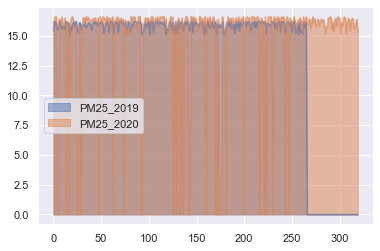

In [703]:
#Draw an area plot for the DataFrame data considering PM25 >15 micrograms
df_PPM15=df_PPM15_All.reset_index()
df_PPM15_All.plot(kind='area', stacked=False)

plt.show(block=True);

In [704]:
df_poll_PM25_1=df_Poll_2019.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].max()
df_poll_PM25_2=df_Poll_2020.groupby('COUNTY', as_index=False)['PM25_UG_PER_CUBIC_METER'].max()

#df_poll_PPM15=df_poll_PPM15_1[df_poll_PPM15_1['PM25_UG_PER_CUBIC_METER']>15]

df_poll_PM25_1.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2019'}, inplace=True)
df_poll_PM25_2.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)


#df_poll_PPM15_2.rename(columns = {'PM25_UG_PER_CUBIC_METER':'PM25_2020'}, inplace=True)
#df_PM25_2=df_poll_PM25_2


In [705]:
df_Poll_PM25=df_poll_PM25_1.append(df_poll_PM25_2)

In [706]:
df_Poll_PM25

,COUNTY,PM25_2019,PM25_2020
0,Ada,15.4,NaN
1,Adams,16.2,NaN
2,Alachua,15.9,NaN
3,Alameda,16.2,NaN
4,Albany,15.6,NaN
...,...,...,...
342,Wright,NaN,15.4
343,Wyandotte,NaN,16.6
344,Yolo,NaN,16.0
345,York,NaN,16.4


In [707]:
df_PPM15['PM25_2019'].values

array([15.4, 16.2, 15.9, 16.2, 15.6, 15.5, 16.2, 16.2, 15.8, 15.6, 15.8,
       15.8, 15.6, 16.2, 16.2, 16.1, 16.1, 15.1, 15.8, 15.5, 16. , 16.1,
       15.9, 16.2, 16.2, 15.4, 15.3, 16.1, 16.1, 15.5, 15.9, 15.9, 15.9,
       16.1, 15.7, 15.7, 16. , 16.1, 16. , 16. , 15.5, 15.7, 16.2, 16.2,
       16. , 16. , 16.1, 15.8, 16.1, 16.2, 16. , 16.1, 16. , 15.2, 15.7,
       16.1, 16. , 16.2, 15.3, 15.8, 16.2, 16.2, 16.2, 15.1, 16.1, 16. ,
       16.2, 16.1, 15.3, 16.2, 16.2, 16.2, 16.2, 16.2, 15.9, 16.1, 15.8,
       15.5, 16.2, 16.2, 15.5, 15.4, 16. , 15.8, 16.2, 16.2, 16.2, 16.1,
       16.1, 16.1, 16.2, 16.2, 16. , 15.1, 15.3, 15.5, 16.1, 15.9, 15.7,
       16.2, 16.1, 15.1, 16.2, 16.2, 16.2, 15.3, 16. , 16.2, 16. , 16.2,
       15.9, 16.2, 16.2, 16. , 16.1, 15.9, 16.2, 15.8, 15.1, 15.6, 15.5,
       16. , 16.2, 16. , 15.5, 16.1, 15.8, 15.2, 16.2, 15.2, 15.8, 16.2,
       15.6, 16.1, 16.2, 16.1, 15.4, 16. , 16.2, 15.9, 16.2, 16.2, 16. ,
       15.4, 16.2, 16.2, 15.3, 16.2, 15.9, 16.2, 16

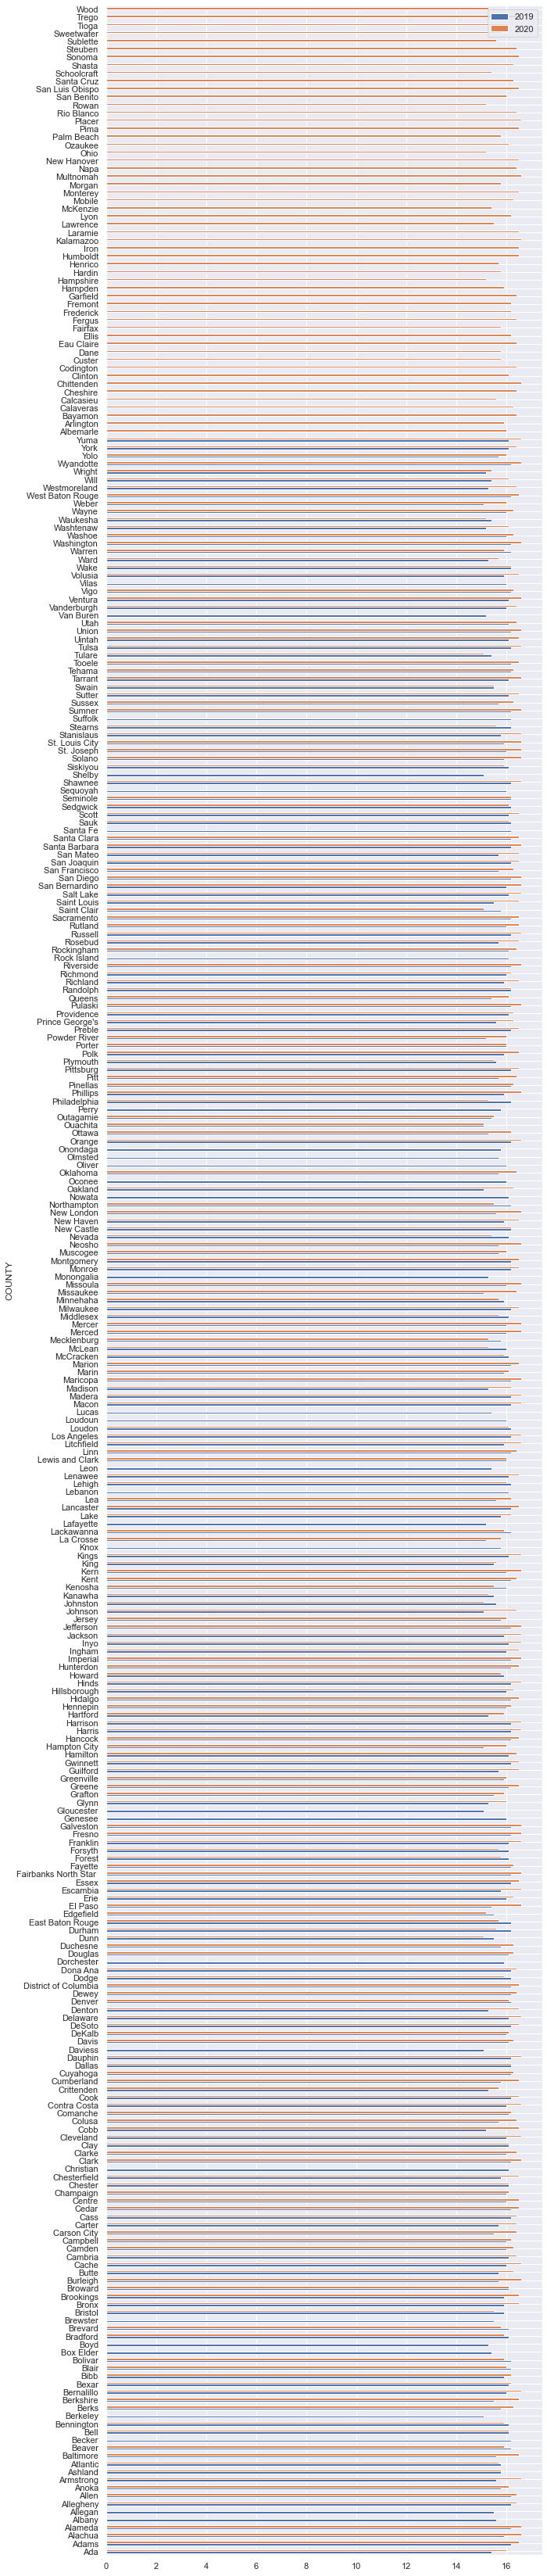

In [709]:
yr2019 = df_PPM15['PM25_2019'].values
yr2020= df_PPM15['PM25_2020'].values

county =df_PPM15['COUNTY']
df = pd.DataFrame({'2019': yr2019,
                   '2020': yr2020}, index=county)
ax = df.plot.barh(figsize=(10, 60))

In [710]:
yr2019_1 = df_PPM15_All['PM25_2019'].values
yr2020_1= df_PPM15_All['PM25_2020'].values

county_1 =df_PPM15_All['COUNTY']
df1 = pd.DataFrame({'2019': yr2019_1,
                   '2020': yr2020_1}, index=county_1)

ax1 = df1.plot.barh(figsize=(80, 250))
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [711]:
### Observation: Many counties have experienced higher PPM2.5 in 2020 than in 2019.

In [712]:
df_Poll_1=df_1[['STATE','COUNTY','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_Poll_1

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
0,Alabama,Baldwin,3.8,0.029
1,Alabama,Baldwin,6.5,0.034
2,Alabama,Baldwin,8.6,0.053
3,Alabama,Baldwin,7.5,0.030
4,Alabama,Baldwin,8.8,0.046
...,...,...,...,...
129465,Puerto Rico,Bayamon,4.1,0.020
129466,Puerto Rico,Bayamon,4.5,0.022
129467,Puerto Rico,Bayamon,3.9,0.022
129468,Puerto Rico,Bayamon,6.1,0.020


In [713]:
df_Poll_2=df_2[['STATE','COUNTY','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_Poll_2

,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
0,Alabama,Baldwin,5.2,0.051
1,Alabama,Baldwin,3.0,0.035
2,Alabama,Baldwin,6.5,0.041
3,Alabama,Baldwin,6.7,0.045
4,Alabama,Baldwin,4.8,0.033
...,...,...,...,...
133413,Puerto Rico,Bayamon,16.4,0.022
133414,Puerto Rico,Bayamon,2.5,0.017
133415,Puerto Rico,Bayamon,6.0,0.025
133416,Puerto Rico,Bayamon,6.9,0.020


In [714]:
#df_poll_OZ


df_Poll_OZ_1=df_Poll_1[df_Poll_1['OZONE_PPM']>0.07]
df_poll_OZ_1=df_Poll_OZ_1.groupby('COUNTY', as_index=False)['OZONE_PPM'].max()

df_Poll_OZ_2=df_Poll_2[df_Poll_2['OZONE_PPM']>0.07]

df_poll_OZ_2=df_Poll_OZ_2.groupby('COUNTY', as_index=False)['OZONE_PPM'].max()

df_poll_OZ_1.rename(columns = {'OZONE_PPM':'OZ_2019'}, inplace=True)
df_poll_OZ_2.rename(columns = {'OZONE_PPM':'OZ_2020'}, inplace=True)

df_Poll_OZ_1
df_Poll_OZ_2


,STATE,COUNTY,PM25_UG_PER_CUBIC_METER,OZONE_PPM
1359,Arizona,La Paz,4.3,0.071
1712,Arizona,Maricopa,7.7,0.073
1732,Arizona,Maricopa,6.6,0.076
1814,Arizona,Maricopa,12.7,0.079
1822,Arizona,Maricopa,14.8,0.072
...,...,...,...,...
130442,Wisconsin,Ozaukee,12.2,0.088
130477,Wisconsin,Ozaukee,8.2,0.081
130629,Wisconsin,Sauk,7.5,0.074
131035,Wisconsin,Waukesha,7.7,0.077


In [715]:
df_Poll_OZ_1
df_Poll_OZ_1=df_Poll_1[df_Poll_1['OZONE_PPM']>0.07]
df_OZ_1=df_Poll_OZ_1.groupby('COUNTY', as_index=False)['OZONE_PPM'].max()
df_OZ_1

,COUNTY,OZONE_PPM
0,Alameda,0.078
1,Allegan,0.073
2,Anoka,0.077
3,Atlantic,0.072
4,Baltimore,0.075
5,Berks,0.081
6,Bernalillo,0.073
7,Bexar,0.078
8,Bronx,0.075
9,Brookings,0.078


In [716]:
df_Poll_OZ_2
df_Poll_OZ_2=df_Poll_2[df_Poll_2['OZONE_PPM']>0.07]
df_OZ_2=df_Poll_OZ_2.groupby('COUNTY', as_index=False)['OZONE_PPM'].max()
df_OZ_2

,COUNTY,OZONE_PPM
0,Allegan,0.081
1,Allegheny,0.071
2,Allen,0.072
3,Armstrong,0.077
4,Baltimore,0.072
5,Becker,0.071
6,Bernalillo,0.072
7,Bexar,0.071
8,Bristol,0.073
9,Clark,0.082


In [717]:


df_OZ =  pd.merge(df_OZ_1, df_OZ_2,  how="inner", on=['COUNTY'])

In [718]:

df_OZ.rename(columns = {'OZONE_PPM_x':'OZONE_2019'}, inplace=True)
df_OZ.rename(columns = {'OZONE_PPM_y':'OZONE_2020'}, inplace=True)
df_OZ

,COUNTY,OZONE_2019,OZONE_2020
0,Allegan,0.073,0.081
1,Baltimore,0.075,0.072
2,Bernalillo,0.073,0.072
3,Bexar,0.078,0.071
4,Clark,0.074,0.082
5,Daviess,0.071,0.072
6,Davis,0.076,0.083
7,Delaware,0.078,0.079
8,Denton,0.079,0.077
9,Denver,0.073,0.078


In [719]:
## take outer join of 2019 and 2020
df_OZ_All =  pd.merge(df_OZ_1, df_OZ_2,  how="outer", on=['COUNTY'])


df_OZ_All.rename(columns = {'OZONE_PPM_x':'OZONE_2019'}, inplace=True)
df_OZ_All.rename(columns = {'OZONE_PPM_y':'OZONE_2020'}, inplace=True)
df_OZ_All

,COUNTY,OZONE_2019,OZONE_2020
0,Alameda,0.078,NaN
1,Allegan,0.073,0.081
2,Anoka,0.077,NaN
3,Atlantic,0.072,NaN
4,Baltimore,0.075,0.072
5,Berks,0.081,NaN
6,Bernalillo,0.073,0.072
7,Bexar,0.078,0.071
8,Bronx,0.075,NaN
9,Brookings,0.078,NaN


In [720]:
#df_OZ_All

yr2019oz = df_OZ_All['OZONE_2019'].values
yr2020oz= df_OZ_All['OZONE_2020'].values

county_2 =df_OZ_All['COUNTY']
df2 = pd.DataFrame({'2019': yr2019oz,
                   '2020': yr2020oz}, index=county_2)
ax2 = df2.plot.barh(figsize=(80, 250))

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)




(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147]),
 [Text(0, 0, 'Alameda'),
  Text(0, 1, 'Allegan'),
  Text(0, 2, 'Anoka'),
  Text(0, 3, 'Atlantic'),
  Text(0, 4, 'Baltimore'),
  Text(0, 5, 'Berks'),
  Text(0, 6, 

### Inference: More counties experienced higher ozone level in 2020 than in 2019.

### Research Query 1: Week day Vs Week end pollution level comparison

In [721]:
df_1['DAYTYPE']=df_1['DATE'].dt.weekday
#dt.strftime('%Y-%m-%d')
df_1

#print(df_1['DATE'].dt.strftime('%Y-%m-%d'))

df_1['WEEKDAY']=(df_1["DAYTYPE"] < 5).astype(int)
df_1

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC,DAYTYPE,WEEKDAY
0,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,3.8,0.029,NaN,NaN,NaN,NaN,NaN,4,1
1,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,6.5,0.034,NaN,NaN,NaN,NaN,NaN,0,1
2,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,8.6,0.053,NaN,NaN,NaN,NaN,NaN,3,1
3,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,7.5,0.030,NaN,NaN,NaN,NaN,NaN,6,0
4,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,8.8,0.046,NaN,NaN,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129465,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,4.1,0.020,NaN,0.079167,0.637500,NaN,NaN,6,0
129466,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,4.5,0.022,NaN,0.116667,0.833333,NaN,NaN,2,1
129467,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,3.9,0.022,NaN,0.095833,0.770833,NaN,NaN,5,0
129468,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,6.1,0.020,NaN,0.075000,0.825000,NaN,NaN,1,1


In [722]:

df_2['DAYTYPE']=df_2['DATE'].dt.weekday
#dt.strftime('%Y-%m-%d')

df_2['WEEKDAY']=(df_2["DAYTYPE"] < 5).astype(int)
df_2

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC,DAYTYPE,WEEKDAY
0,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,5.2,0.051,NaN,NaN,NaN,NaN,NaN,6,0
1,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,3.0,0.035,NaN,NaN,NaN,NaN,NaN,2,1
2,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,6.5,0.041,NaN,NaN,NaN,NaN,NaN,5,0
3,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,6.7,0.045,NaN,NaN,NaN,NaN,NaN,1,1
4,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,NaN,4.8,0.033,NaN,NaN,NaN,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133413,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,16.4,0.022,NaN,0.450000,0.295833,NaN,NaN,4,1
133414,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,2.5,0.017,NaN,0.345833,0.125000,NaN,NaN,2,1
133415,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,6.0,0.025,NaN,0.500000,0.250000,NaN,NaN,5,0
133416,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,NaN,6.9,0.020,NaN,0.500000,NaN,NaN,NaN,1,1


In [723]:
print(df_1['DAYTYPE'].isna().sum())

0


In [724]:
print(df_2['DAYTYPE'].isna().sum())

0


In [725]:
df_1_Tmp = pd.get_dummies(df_1, columns = {'WEEKDAY'}) 
df_1_Tmp


,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC,DAYTYPE,WEEKDAY_0,WEEKDAY_1
0,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,3.8,0.029,NaN,NaN,NaN,NaN,NaN,4,0,1
1,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,6.5,0.034,NaN,NaN,NaN,NaN,NaN,0,0,1
2,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,8.6,0.053,NaN,NaN,NaN,NaN,NaN,3,0,1
3,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,7.5,0.030,NaN,NaN,NaN,NaN,NaN,6,1,0
4,01-003-0010,30.497478,-87.880258,Baldwin,Alabama,"Daphne-Fairhope-Foley, AL",0.13,0.26,0.0,0.03,...,8.8,0.046,NaN,NaN,NaN,NaN,NaN,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129465,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,4.1,0.020,NaN,0.079167,0.637500,NaN,NaN,6,1,0
129466,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,4.5,0.022,NaN,0.116667,0.833333,NaN,NaN,2,0,1
129467,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,3.9,0.022,NaN,0.095833,0.770833,NaN,NaN,5,1,0
129468,72-021-0010,18.420089,-66.150615,Bayamon,Puerto Rico,"San Juan-Carolina-Caguas, PR",NaN,NaN,NaN,NaN,...,6.1,0.020,NaN,0.075000,0.825000,NaN,NaN,1,0,1


### Ozone concentration

In [726]:
df_1_Tmp_1=df_1[['OZONE_PPM','DAYTYPE']]
df_1_Tmp_1


,OZONE_PPM,DAYTYPE
0,0.029,4
1,0.034,0
2,0.053,3
3,0.030,6
4,0.046,2
...,...,...
129465,0.020,6
129466,0.022,2
129467,0.022,5
129468,0.020,1


In [727]:
x0 = df_1_Tmp_1['DAYTYPE'].values
print(x0)

[4 0 3 ... 5 1 4]


In [728]:
y0= df_1_Tmp_1.groupby('DAYTYPE').mean()

y0=y0.rename(columns={'OZONE_PPM':'OZONE_PPM_2019'})
print(y0)

         OZONE_PPM_2019
DAYTYPE                
0              0.039893
1              0.040183
2              0.040203
3              0.039885
4              0.039880
5              0.040719
6              0.040148


In [729]:
'''
df_2_Tmp = pd.get_dummies(df_2, columns = {'WEEKDAY'}) 
df_2_Tmp
'''

"\ndf_2_Tmp = pd.get_dummies(df_2, columns = {'WEEKDAY'}) \ndf_2_Tmp\n"

In [730]:
df_2_Tmp_1=df_2[['OZONE_PPM','DAYTYPE']]
df_2_Tmp_1

,OZONE_PPM,DAYTYPE
0,0.051,6
1,0.035,2
2,0.041,5
3,0.045,1
4,0.033,4
...,...,...
133413,0.022,4
133414,0.017,2
133415,0.025,5
133416,0.020,1


In [731]:
x1 = df_2_Tmp_1['DAYTYPE'].values
print(x1)

[6 2 5 ... 5 1 0]


In [732]:
y1= df_2_Tmp_1.groupby('DAYTYPE').mean()

y1=y1.rename(columns={'OZONE_PPM':'OZONE_PPM_2020'})
print(y1)

y2=pd.merge(y0,y1, how="inner", on="DAYTYPE")


         OZONE_PPM_2020
DAYTYPE                
0              0.037802
1              0.037947
2              0.038510
3              0.038618
4              0.038674
5              0.038772
6              0.038324


In [733]:
y2.reset_index(inplace=True)
y2 = y2.rename(columns = {'index':'DAYTYPE'})
#print(y2)


from calendar import day_name

y2['DAYNAME'] = y2['DAYTYPE'].apply(lambda w:day_name[w])
print(y2)
#y2.drop('DAYTYPE', axis=1)


   DAYTYPE  OZONE_PPM_2019  OZONE_PPM_2020    DAYNAME
0        0        0.039893        0.037802     Monday
1        1        0.040183        0.037947    Tuesday
2        2        0.040203        0.038510  Wednesday
3        3        0.039885        0.038618   Thursday
4        4        0.039880        0.038674     Friday
5        5        0.040719        0.038772   Saturday
6        6        0.040148        0.038324     Sunday


In [734]:
y2.set_index('DAYNAME',inplace=True)
print(y2)

           DAYTYPE  OZONE_PPM_2019  OZONE_PPM_2020
DAYNAME                                           
Monday           0        0.039893        0.037802
Tuesday          1        0.040183        0.037947
Wednesday        2        0.040203        0.038510
Thursday         3        0.039885        0.038618
Friday           4        0.039880        0.038674
Saturday         5        0.040719        0.038772
Sunday           6        0.040148        0.038324


DAYNAME
Monday       0.039893
Tuesday      0.040183
Wednesday    0.040203
Thursday     0.039885
Friday       0.039880
Saturday     0.040719
Sunday       0.040148
Name: OZONE_PPM_2019, dtype: float64
DAYNAME
Monday       0.037802
Tuesday      0.037947
Wednesday    0.038510
Thursday     0.038618
Friday       0.038674
Saturday     0.038772
Sunday       0.038324
Name: OZONE_PPM_2020, dtype: float64


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

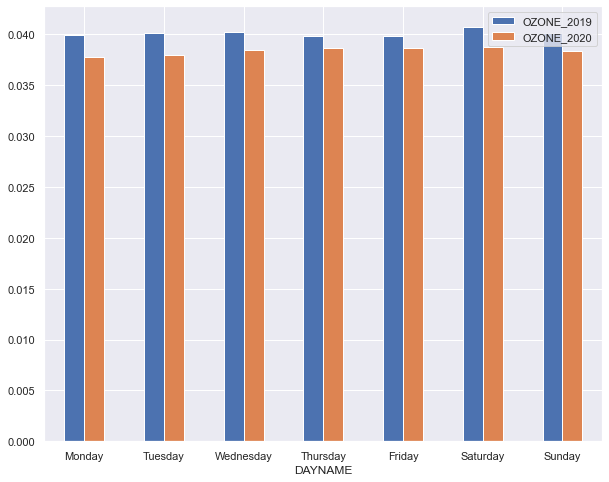

In [735]:


#df_2_Tmp_0.to_csv(r'OZONE_WEEKDAY.csv')
'''
df = pd.DataFrame({'2019': yr2019,
                   '2020': yr2020}, index=county)
'''
oz_2019=y2['OZONE_PPM_2019']

print(oz_2019)
oz_2020=y2['OZONE_PPM_2020']
print(oz_2020)
#dayName=y2['DAYNAME'].values
#print(dayName)
#dayType=y2['DAYNAME'].values


dfW = pd.DataFrame({'OZONE_2019': oz_2019,
                   'OZONE_2020': oz_2020})

ax1 = dfW.plot.bar(figsize=(10, 8))

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0)

#plt.scatter(df_2_Tmp_1['DAYTYPE'], df_2_Tmp_1['OZONE_PPM'], s = None, c = None, marker = None, cmap = None, vmin = None, vmax = None, alpha = None, linewidths = None, edgecolors = None)


#sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)

#sns.set_style("whitegrid")
#sns.set(rc={"figure.figsize":(10, 8)}) 
  
#bxp=sns.boxplot(x = 'DAYTYPE', y = 'OZONE_PPM', data = df_2_Tmp_1, showmeans=True,whis=[5, 95])
#bxp.set_xticklabels(bxp.get_xticklabels(),rotation=90)
#plt.show()



#sns.heatmap(df_2_Tmp_1, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)


In [736]:
df_1_PPM_2019=df_1[['PM25_UG_PER_CUBIC_METER','DAYTYPE']]
df_1_PPM_2019


df_1_PPM_2020=df_2[['PM25_UG_PER_CUBIC_METER','DAYTYPE']]
df_1_PPM_2020


,PM25_UG_PER_CUBIC_METER,DAYTYPE
0,5.2,6
1,3.0,2
2,6.5,5
3,6.7,1
4,4.8,4
...,...,...
133413,16.4,4
133414,2.5,2
133415,6.0,5
133416,6.9,1


In [737]:
x5 = df_1_PPM_2019['DAYTYPE'].values
print(x5)


[4 0 3 ... 5 1 4]


In [738]:

y5= df_1_PPM_2019.groupby('DAYTYPE').mean()

y5=y5.rename(columns={'PM25_UG_PER_CUBIC_METER':'PPM25_2019'})
print(y5)



         PPM25_2019
DAYTYPE            
0          6.230468
1          6.419479
2          6.544204
3          6.424266
4          6.541763
5          6.543928
6          6.325170


In [739]:
y5= df_1_PPM_2019.groupby('DAYTYPE').mean()

y5=y5.rename(columns={'PM25_UG_PER_CUBIC_METER':'PPM25_2019'})
print(y5)

         PPM25_2019
DAYTYPE            
0          6.230468
1          6.419479
2          6.544204
3          6.424266
4          6.541763
5          6.543928
6          6.325170


In [740]:
df_2_Tmp_2=df_2[['PM25_UG_PER_CUBIC_METER','DAYTYPE']]
df_2_Tmp_2


,PM25_UG_PER_CUBIC_METER,DAYTYPE
0,5.2,6
1,3.0,2
2,6.5,5
3,6.7,1
4,4.8,4
...,...,...
133413,16.4,4
133414,2.5,2
133415,6.0,5
133416,6.9,1


In [741]:
x6 = df_1_PPM_2020['DAYTYPE'].values
print(x6)


[6 2 5 ... 5 1 0]


In [742]:

y6= df_1_PPM_2020.groupby('DAYTYPE').mean()

y6=y6.rename(columns={'PM25_UG_PER_CUBIC_METER':'PPM25_2020'})
print(y6)



         PPM25_2020
DAYTYPE            
0          6.338489
1          6.452461
2          6.528337
3          6.586072
4          6.711632
5          6.709221
6          6.578326


In [749]:
df_1_PPM_2020=df_2[['PM25_UG_PER_CUBIC_METER','DAYTYPE']]
df_1_PPM_2020

x7 = df_1_PPM_2020['DAYTYPE'].values
print(x7)

[6 2 5 ... 5 1 0]


In [750]:
y8=pd.merge(y5,y6, how="inner", on="DAYTYPE")

y8

,PPM25_2019,PPM25_2020
DAYTYPE,,
0,6.230468,6.338489
1,6.419479,6.452461
2,6.544204,6.528337
3,6.424266,6.586072
4,6.541763,6.711632
5,6.543928,6.709221
6,6.325170,6.578326


In [751]:
y8.reset_index(inplace=True)
y8 = y8.rename(columns = {'index':'DAYTYPE'})
#print(y2)


In [752]:
from calendar import day_name

y8['DAYNAME'] = y8['DAYTYPE'].apply(lambda w:day_name[w])
print(y8)
#y8.drop('DAYTYPE', axis=1)



   DAYTYPE  PPM25_2019  PPM25_2020    DAYNAME
0        0    6.230468    6.338489     Monday
1        1    6.419479    6.452461    Tuesday
2        2    6.544204    6.528337  Wednesday
3        3    6.424266    6.586072   Thursday
4        4    6.541763    6.711632     Friday
5        5    6.543928    6.709221   Saturday
6        6    6.325170    6.578326     Sunday


In [753]:
y8.set_index('DAYNAME',inplace=True)
print(y8)


           DAYTYPE  PPM25_2019  PPM25_2020
DAYNAME                                   
Monday           0    6.230468    6.338489
Tuesday          1    6.419479    6.452461
Wednesday        2    6.544204    6.528337
Thursday         3    6.424266    6.586072
Friday           4    6.541763    6.711632
Saturday         5    6.543928    6.709221
Sunday           6    6.325170    6.578326


DAYNAME
Monday       6.230468
Tuesday      6.419479
Wednesday    6.544204
Thursday     6.424266
Friday       6.541763
Saturday     6.543928
Sunday       6.325170
Name: PPM25_2019, dtype: float64
DAYNAME
Monday       6.338489
Tuesday      6.452461
Wednesday    6.528337
Thursday     6.586072
Friday       6.711632
Saturday     6.709221
Sunday       6.578326
Name: PPM25_2020, dtype: float64


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

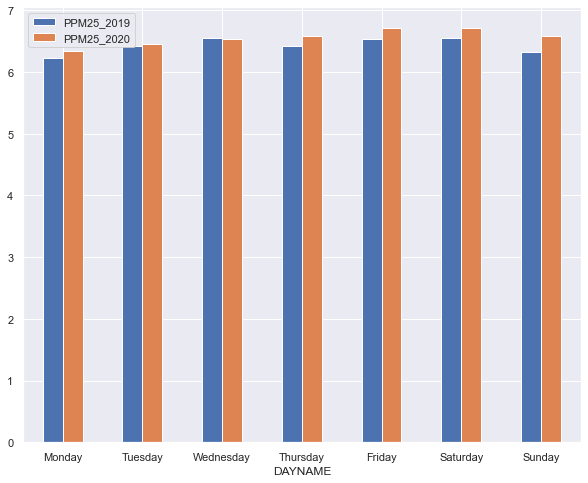

In [754]:
ppm_2019=y8['PPM25_2019']

print(ppm_2019)
ppm_2020=y8['PPM25_2020']
print(ppm_2020)


dfX = pd.DataFrame({'PPM25_2019': ppm_2019,
                   'PPM25_2020': ppm_2020})

ax2 = dfX.plot.bar(figsize=(10, 8))

ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0)

